In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import neuropythy as ny
import ipyvolume as ipv
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from scipy.ndimage import gaussian_filter

# Betas

In [3]:
sub_name = '001'
sub = ny.freesurfer_subject(f'F:\\ds003812-download\\derivatives\\freesurfer\\wlsubj{sub_name}')
betas = np.load(f"F:\\ds003812-download\\derivatives\\processed\\betas\\betas_sub-wlsubj{sub_name}_ses-04_task-sfprescaled_results.mat.npy")

# betas_freq = betas[0]
# colores_normalizados = (betas_freq - np.min(betas_freq)) / (np.max(betas_freq) - np.min(betas_freq))
# colores_rgba = plt.cm.viridis(betas_freq)

# fig = ipv.figure()

# ny.cortex_plot(sub.lh, surface='pial', figure=fig, color=colores_rgba[0:sub.lh.vertex_count])
# ny.cortex_plot(sub.rh, surface='pial', figure=fig, color=colores_rgba[sub.lh.vertex_count:])

# ipv.show()

# ny.cortex_plot(sub.lh, surface='inflated', color=colores_rgba[0:sub.lh.vertex_count])


# Smoothed Betas

In [4]:
smoothed_betas = np.load(f"F:\\ds003812-download\\derivatives\\processed\\betas\\smoothed_betas_sub-wlsubj{sub_name}_ses-04_task-sfprescaled_results.mat.npy")

# colores_rgba = plt.cm.viridis(smoothed_betas[0])

# fig = ipv.figure()

# ny.cortex_plot(sub.lh, surface='pial', figure=fig, color=colores_rgba[0:sub.lh.vertex_count])
# ny.cortex_plot(sub.rh, surface='pial', figure=fig, color=colores_rgba[sub.lh.vertex_count:])

# ipv.show()

# ny.cortex_plot(sub.lh, surface='inflated', color=colores_rgba[0:sub.lh.vertex_count])


# Size pRF

Tamaño de pRF por sujeto.

In [ ]:
df_1 = pd.read_csv("C:\\Users\\Marie\\Documents\\thesis\\broderick\\table_size_prf.csv")
df_2 = pd.read_csv("C:\\Users\\Marie\\Documents\\thesis\\broderick\\table_size_prf_benson14.csv")
df_3 = pd.read_csv("C:\\Users\\Marie\\Documents\\thesis\\broderick\\table_size_prf_data_full.csv")
df_4 = pd.read_csv("C:\\Users\\Marie\\Documents\\thesis\\broderick\\table_size_prf_data_full_inferred_varea.csv")

dfs = [df_1,df_2,df_3,df_4]

rois = ['V1','V2','V3','hV4','VO1','VO2','V3a','V3b','LO1','LO2','TO1','TO2']

isub = 1
index_df = 3

mean_size_l = []
mean_size_r = []
median_size_l = []
median_size_r = []

for index_roi in range(1,13):
    
    current_df_0 = dfs[index_df][(dfs[index_df]['subj']==isub) & (dfs[index_df]['roi']==index_roi) & (dfs[index_df]['side']==0)]
    current_df_1 = dfs[index_df][(dfs[index_df]['subj']==isub) & (dfs[index_df]['roi']==index_roi) & (dfs[index_df]['side']==1)]

    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))

    mean_size_l.append(np.mean(current_df_0['size']))
    mean_size_r.append(np.mean(current_df_1['size']))

    median_size_l.append(np.median(current_df_0['size']))
    median_size_r.append(np.median(current_df_1['size']))

    all_data = [current_df_0['size'],current_df_1['size']]  

    axs[0].violinplot(all_data,
                      showmeans=True,
                      showmedians=False)
    axs[0].set_title('Violin plot')

    # plot box plot
    axs[1].boxplot(all_data)
    axs[1].set_title(f'{rois[index_roi-1]}')

    # adding horizontal grid lines
    for ax in axs:
        ax.yaxis.grid(True)
        ax.set_xticks([y + 1 for y in range(len(all_data))],
                      labels=['left', 'right'])
        ax.set_xlabel('hemispheres')
        ax.set_ylabel('size')

    plt.show()

plt.plot(rois,mean_size_l,color='steelblue')
plt.plot(rois,mean_size_r, color='lightcoral')
plt.xlabel('rois')
plt.ylabel('prf size mean')
plt.title("Mean")
plt.show()

plt.plot(rois,median_size_l,color='steelblue')
plt.plot(rois,median_size_r, color='lightcoral')
plt.xlabel('rois')
plt.ylabel('prf size median')
plt.title("Median")
plt.show()



Tamaño de pRF promedio por hemisferio y por roi.

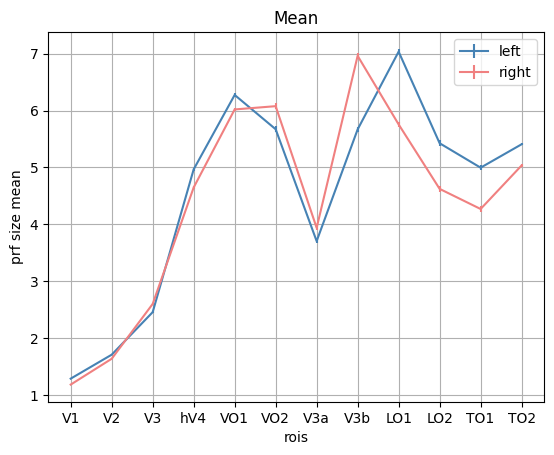

In [10]:
mean_size_left = []
mean_size_right = []
error_l = []
error_r = []

for roi in range(1,13):
    size_l = dfs[3][(dfs[3]['side']==0) & (dfs[3]['roi']==roi)]['size']
    size_r = dfs[3][(dfs[3]['side']==1) & (dfs[3]['roi']==roi)]['size']
    mean_size_left.append(np.mean(size_l))
    mean_size_right.append(np.mean(size_r))
    error_l.append(np.std(size_l)/np.sqrt(len(size_l)))
    error_r.append(np.std(size_r)/np.sqrt(len(size_r)))

    
plt.errorbar(rois,mean_size_left,yerr=error_l,color='steelblue', label='left')
plt.errorbar(rois,mean_size_right,yerr=error_l, color='lightcoral', label='right')
plt.xlabel('rois')
plt.ylabel('prf size mean')
plt.title("Mean")
plt.legend()
plt.grid()
plt.show()
    

# Frequency

Betas por sujetos. Se puede graficar el comportamiento de los datos en todas las rois defindas.

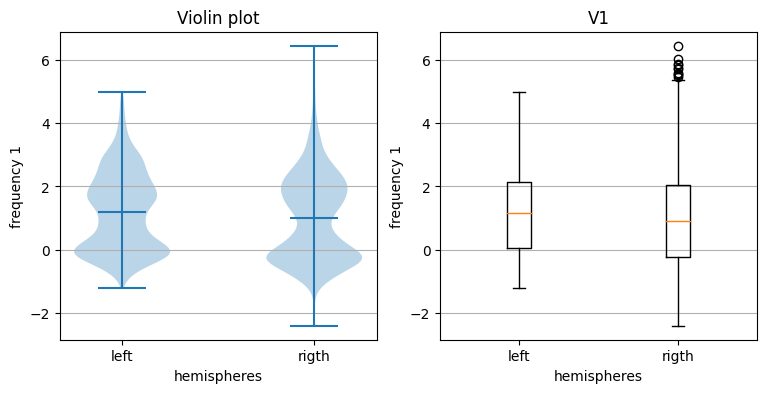

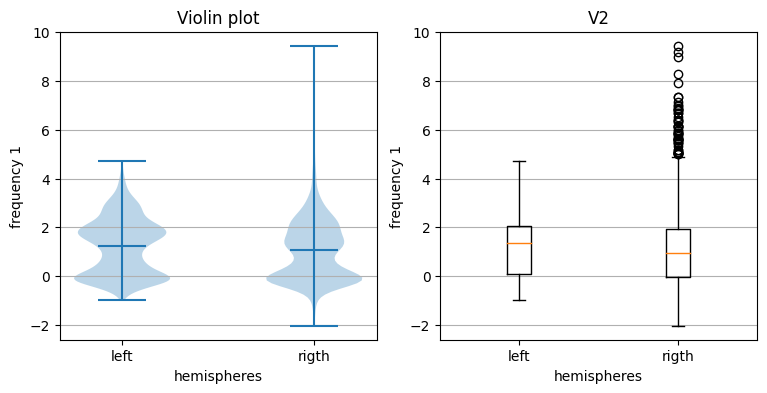

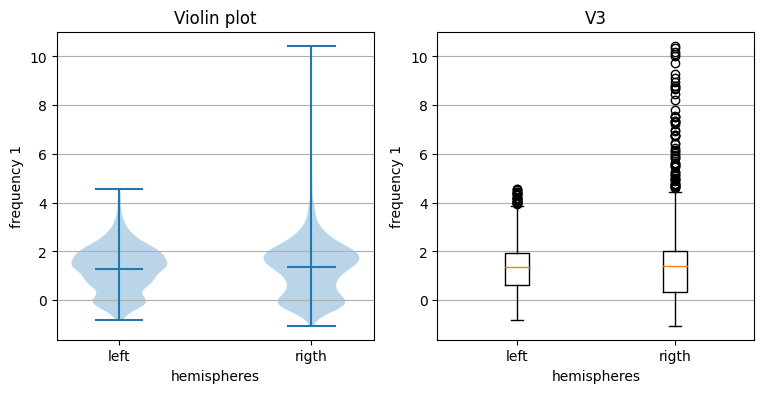

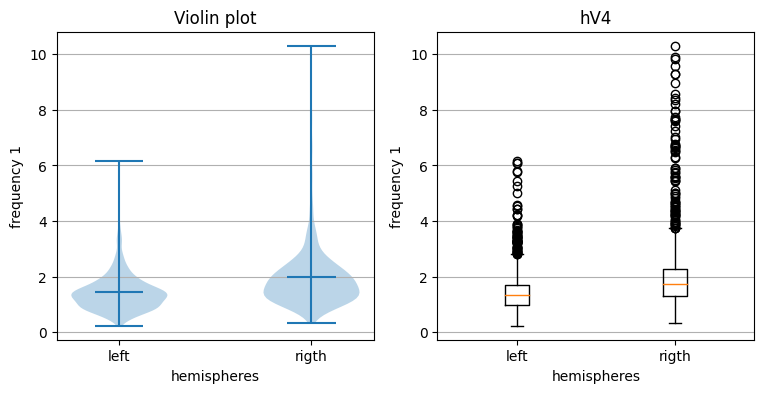

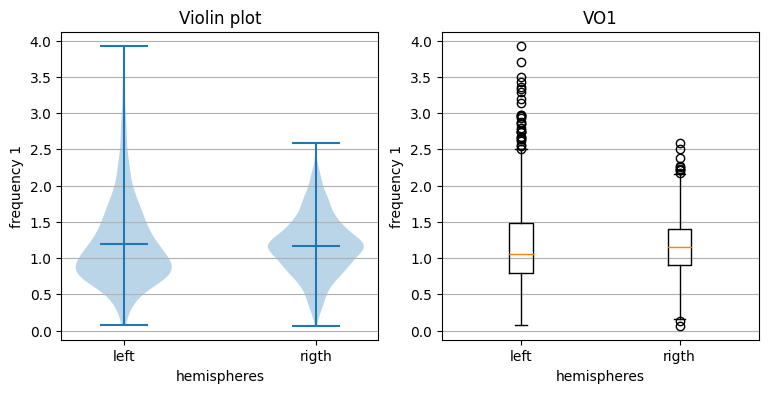

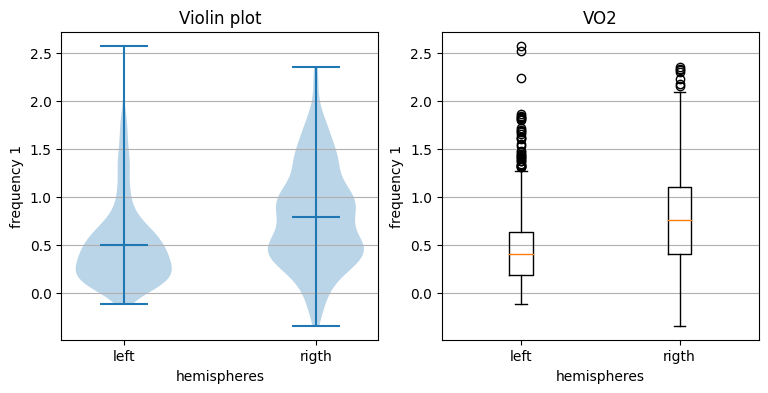

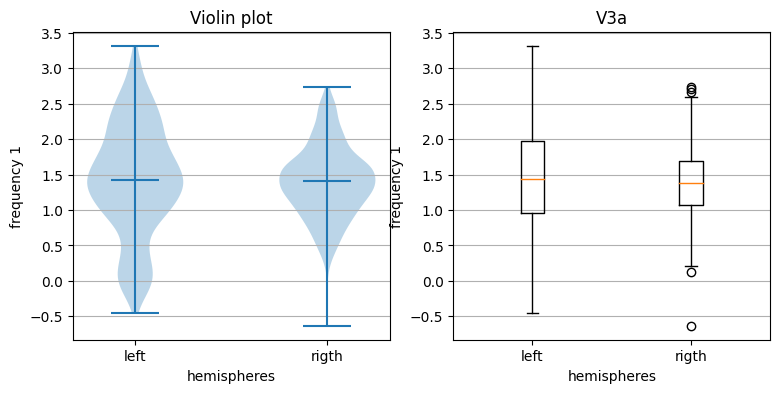

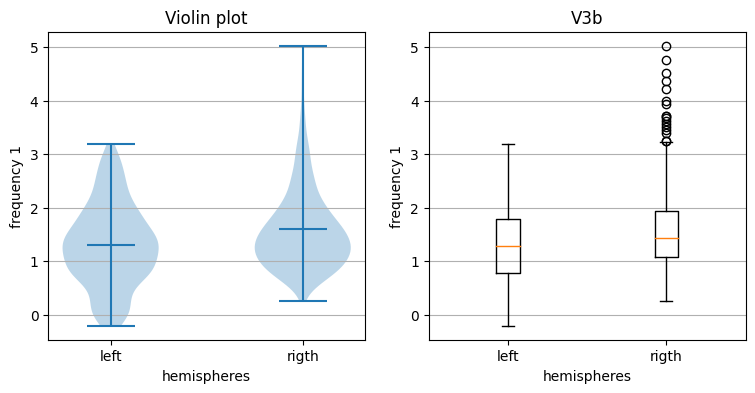

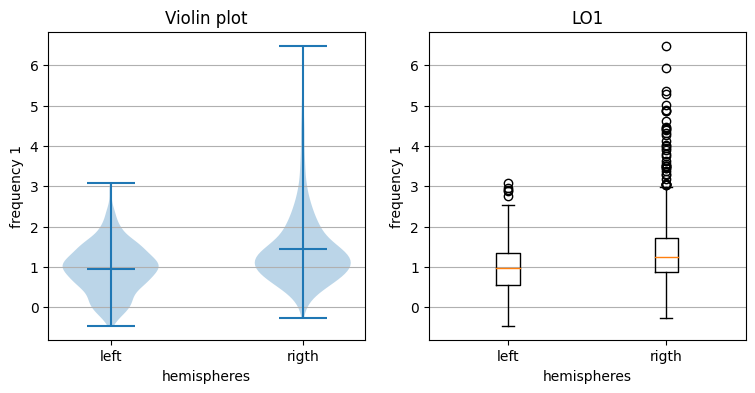

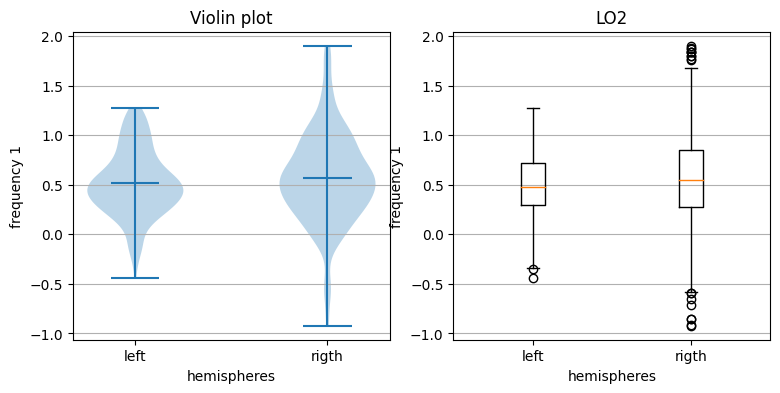

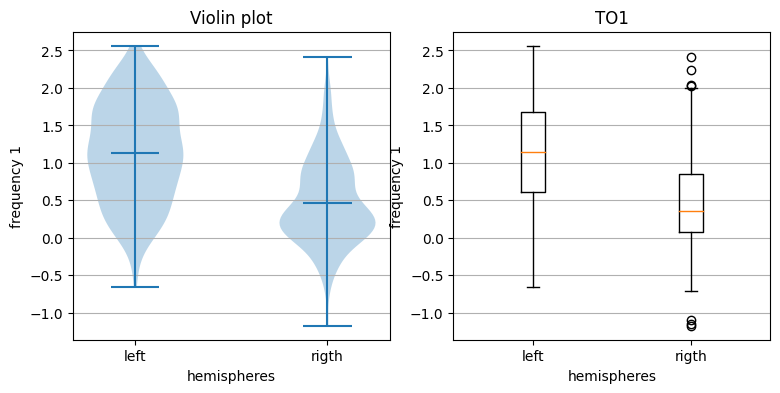

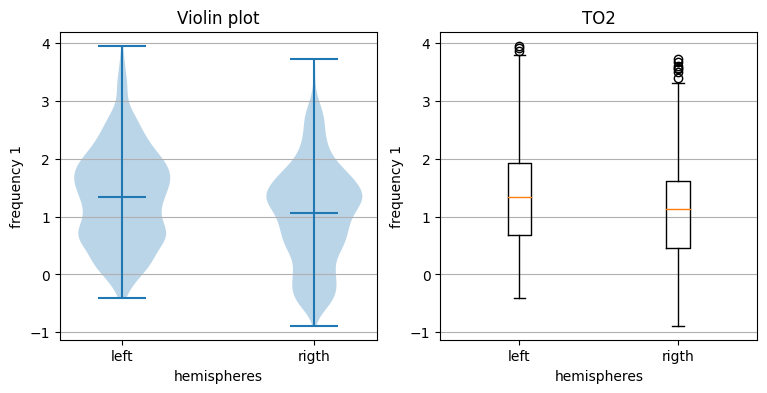

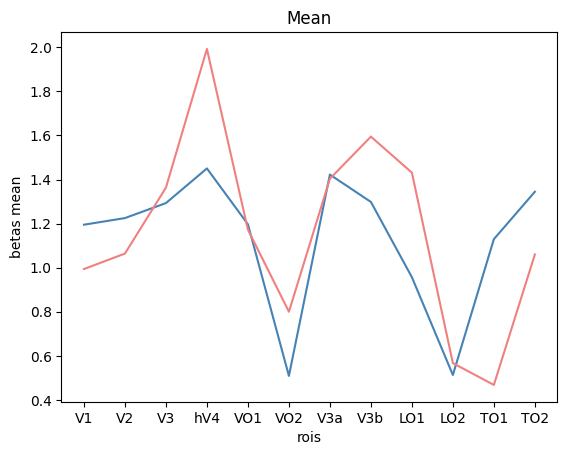

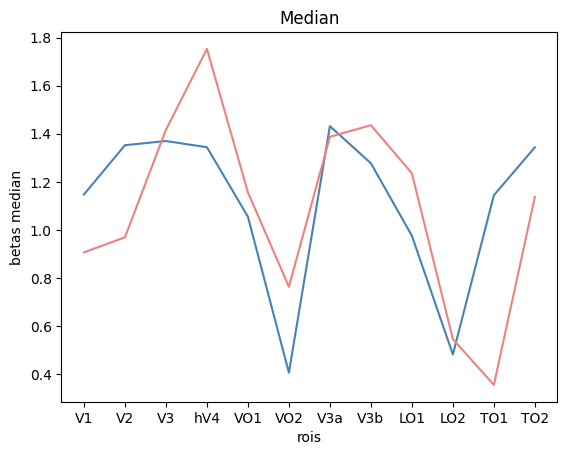

In [22]:
freq = 0
rois = ['V1','V2','V3','hV4','VO1','VO2','V3a','V3b','LO1','LO2','TO1','TO2']

rois_data = np.load(f"F:\\ds003812-download\\derivatives\\prf_solutions\\all\\sub-wlsubj{sub_name}_inferred_varea.npy", allow_pickle=True)

betasL = smoothed_betas[freq][0:sub.lh.vertex_count]
betasR = smoothed_betas[freq][sub.lh.vertex_count:]   

mean_betasL = []
mean_betasR = []

median_betasL = []
median_betasR = []

for index_roi in range(1,13):
    idx_left = np.where(rois_data[0]==index_roi)
    idx_right= np.where(rois_data[1]==index_roi)

    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
    
    mean_betasL.append(np.mean(betasL[idx_left]))
    mean_betasR.append(np.mean(betasR[idx_right]))

    median_betasL.append(np.median(betasL[idx_left]))
    median_betasR.append(np.median(betasR[idx_right]))

    all_data = [betasL[idx_left],betasR[idx_right]]  
    
    axs[0].violinplot(all_data,
                      showmeans=True,
                      showmedians=False)
    axs[0].set_title('Violin plot')
    # plot box plot
    axs[1].boxplot(all_data)
    axs[1].set_title(f'{rois[index_roi-1]}')
    # adding horizontal grid lines
    for ax in axs:
        ax.yaxis.grid(True)
        ax.set_xticks([y + 1 for y in range(len(all_data))],
                      labels=['left', 'right'])
        ax.set_xlabel('hemispheres')
        ax.set_ylabel(f'frequency {freq + 1}')
    plt.show()

plt.plot(rois,mean_betasL,color='steelblue')
plt.plot(rois,mean_betasR, color='lightcoral')
plt.xlabel('rois')
plt.ylabel('betas mean')
plt.title("Mean")
plt.show()

plt.plot(rois,median_betasL,color='steelblue')
plt.plot(rois,median_betasR, color='lightcoral')
plt.xlabel('rois')
plt.ylabel('betas median')
plt.title("Median")
plt.show()

Betas promedio por hemiferio. Se grafica, por roi, el comportamiento de los datos betas en la frecuencia annulus con diferentes valores $w_a$.

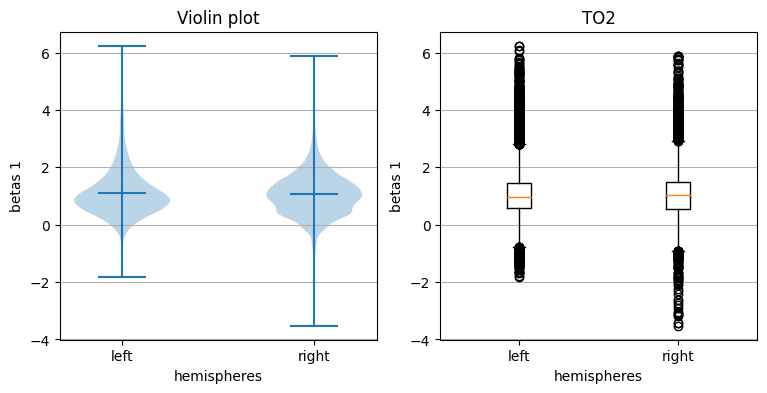

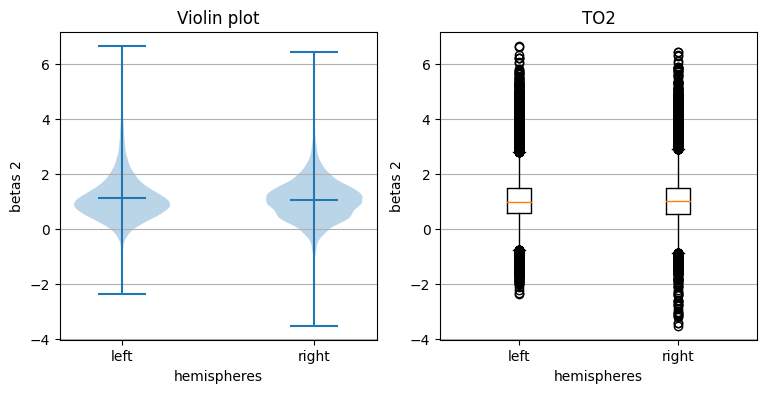

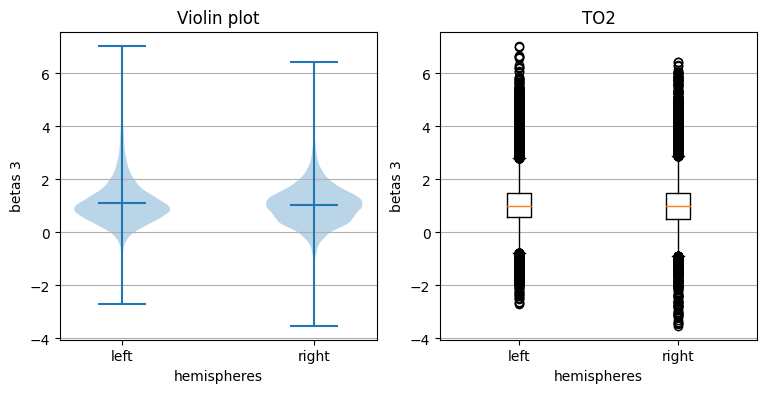

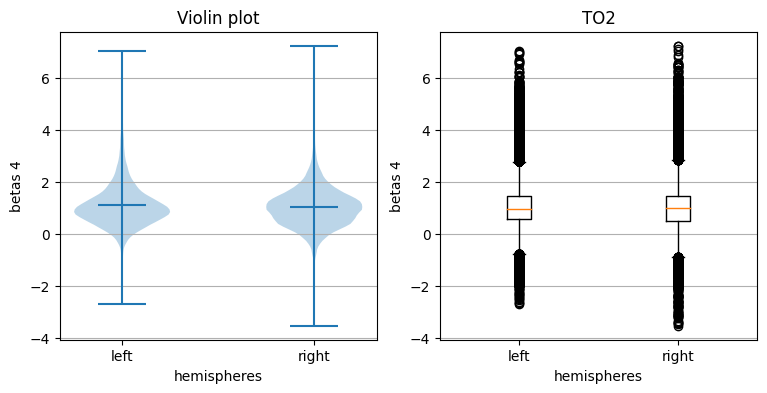

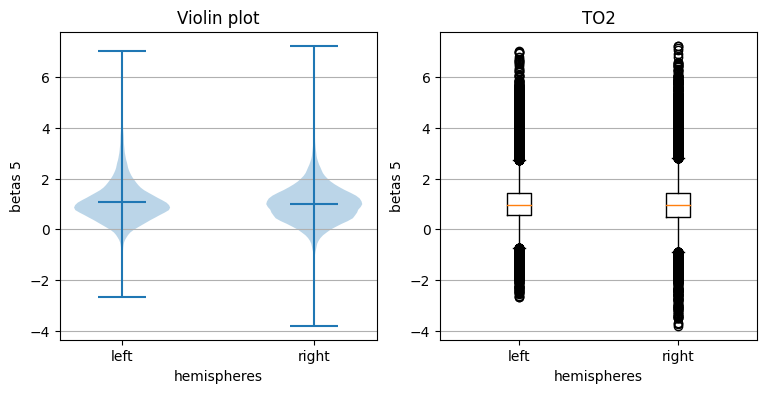

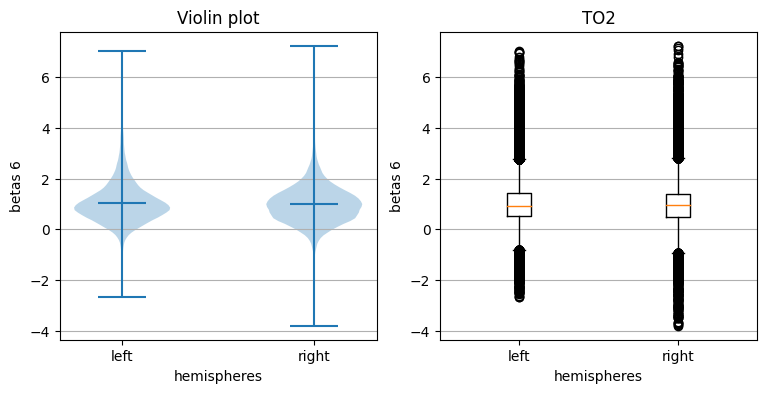

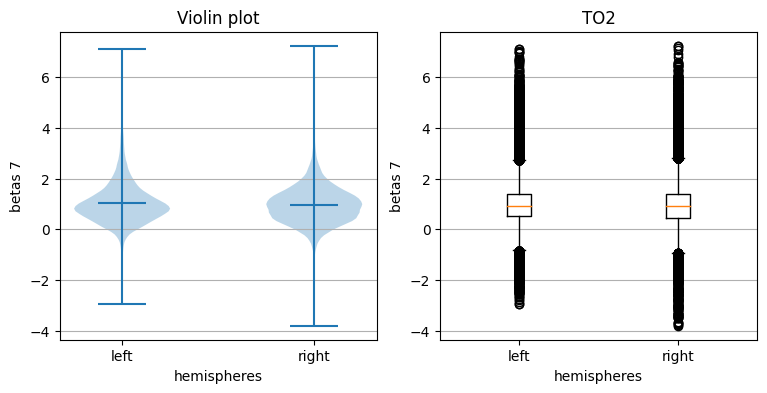

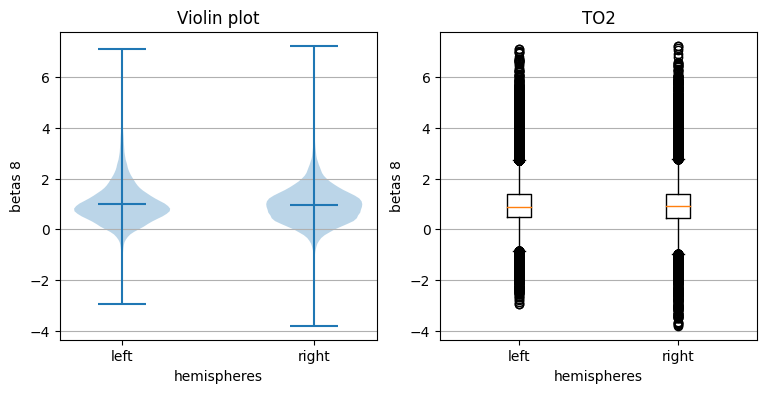

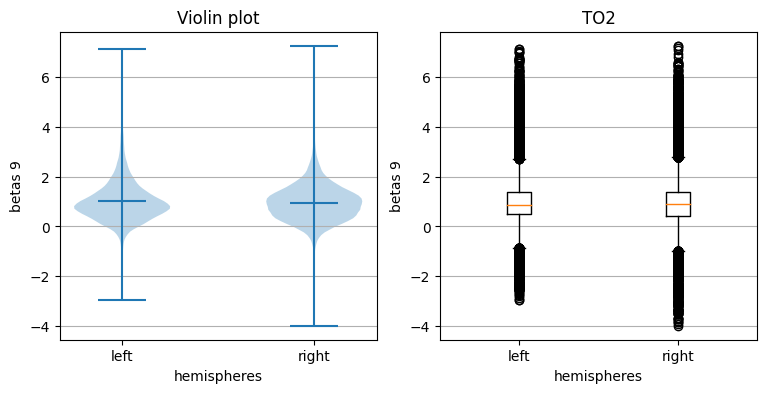

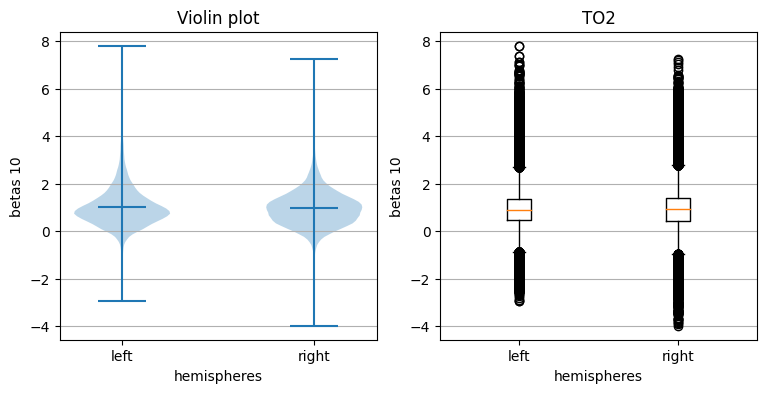

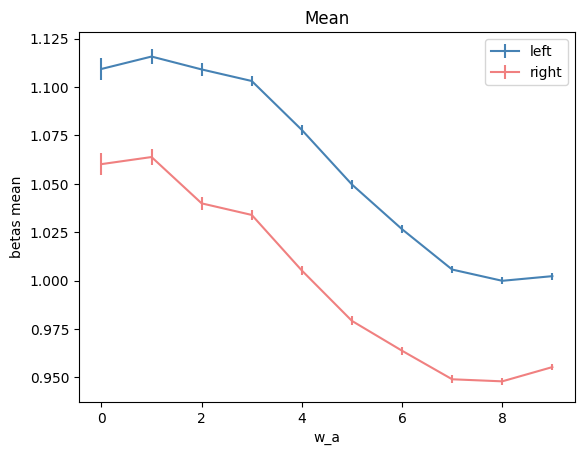

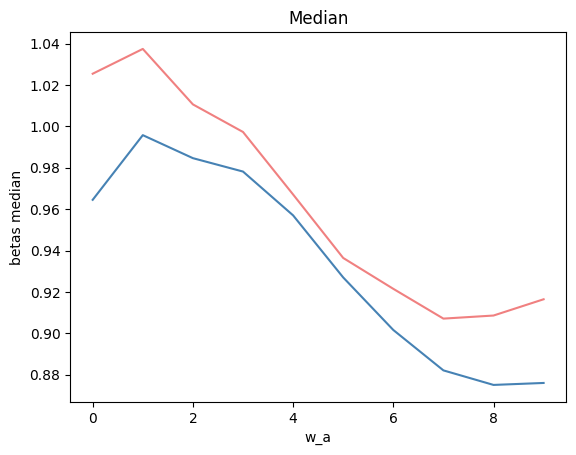

In [40]:
mean_left = []
mean_right= []
median_left = []
median_right = []
error_left = []
error_right = []

roi = 12
for i in range(10):
    data = pd.read_csv(f"C:\\Users\\Marie\\Documents\\thesis\\broderick\\table_beta_freq_{i}_data_full_inferred_varea.csv")

    betas_left = data[(data['side']==0) & (data['roi']==roi)]
    betas_right = data[(data['side']==1) & (data['roi']==roi)]

    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))

    betas_left = gaussian_filter(betas_left['betas'],sigma=3.0)
    betas_right = gaussian_filter(betas_right['betas'],sigma=3.0)

    mean_left.append(np.mean(betas_left))
    mean_right.append(np.mean(betas_right))
    median_left.append(np.median(betas_left))
    median_right.append(np.median(betas_right))

    error_left.append(np.std(betas_left)/np.sqrt(len(betas_left)))
    error_right.append(np.std(betas_right)/np.sqrt(len(betas_right)))

    all_data = [betas_left,betas_right]

    axs[0].violinplot(all_data,
                      showmeans=True,
                      showmedians=False)
    axs[0].set_title('Violin plot')
    # plot box plot
    axs[1].boxplot(all_data)
    axs[1].set_title(f'{rois[roi-1]}')
    # adding horizontal grid lines
    for ax in axs:
        ax.yaxis.grid(True)
        ax.set_xticks([y + 1 for y in range(len(all_data))],
                      labels=['left', 'right'])
        ax.set_xlabel('hemispheres')
        ax.set_ylabel(f'betas {i + 1}')
    plt.show()

plt.errorbar(np.arange(0,10,1), mean_left,yerr=error_left,color='steelblue', label='left')
plt.errorbar(np.arange(0,10,1),mean_right, yerr=error_left, color='lightcoral', label = 'right')
plt.xlabel('w_a')
plt.ylabel('betas mean')
plt.title("Mean")
plt.legend()
plt.show()

plt.plot(np.arange(0,10,1), median_left,color='steelblue')
plt.plot(np.arange(0,10,1),median_right, color='lightcoral')
plt.xlabel('w_a')
plt.ylabel('betas median')
plt.title("Median")
plt.show()

Frecuencia espacial preferida de acuerdo a la fórmula:

$w_l = \frac{\sqrt{w_a^2 + w_r^2}}{e}$

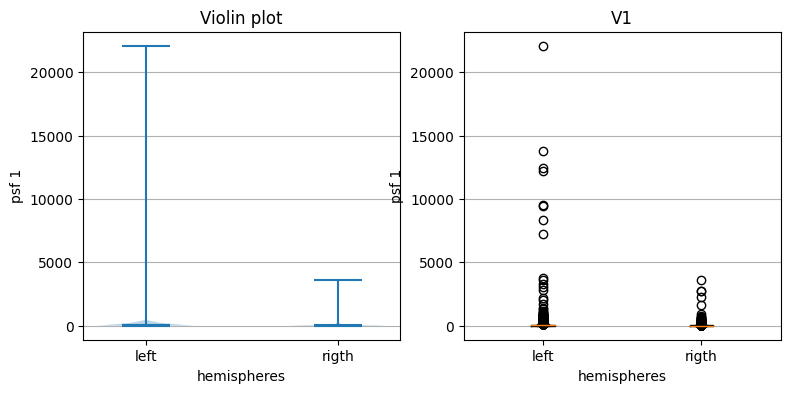

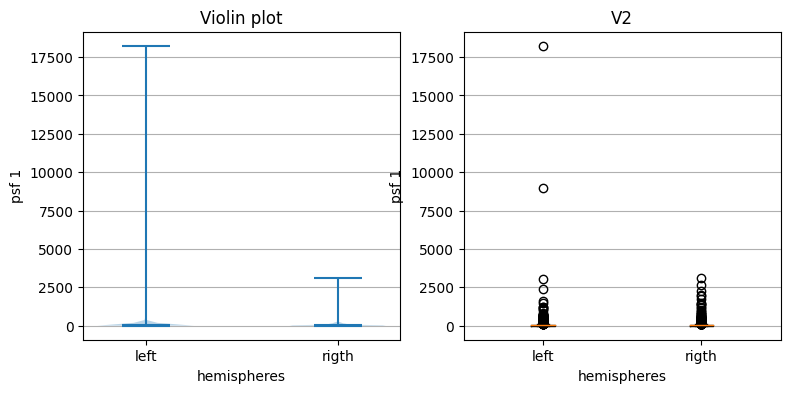

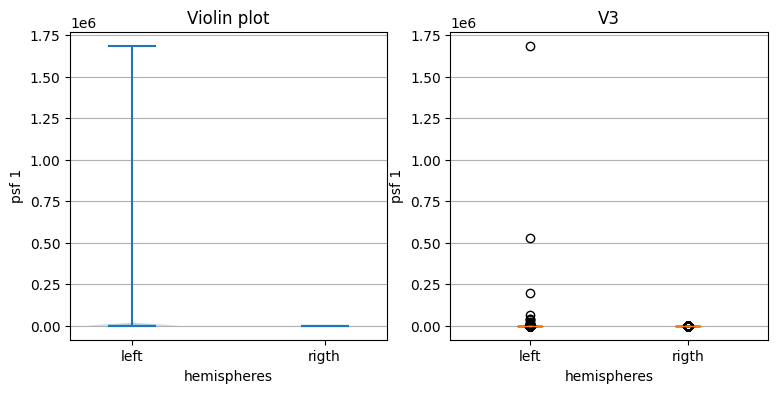

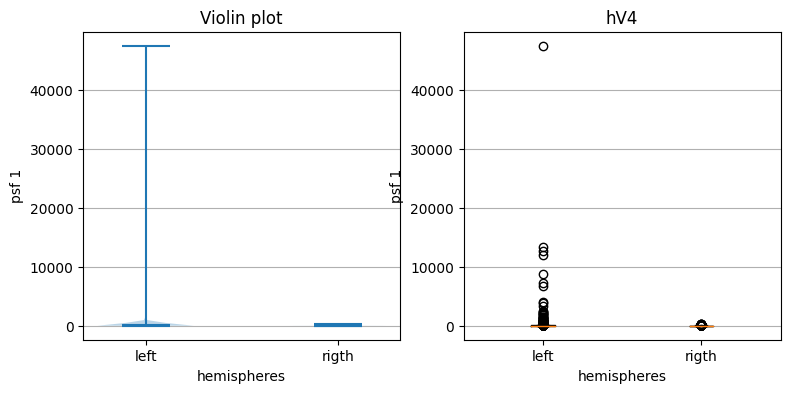

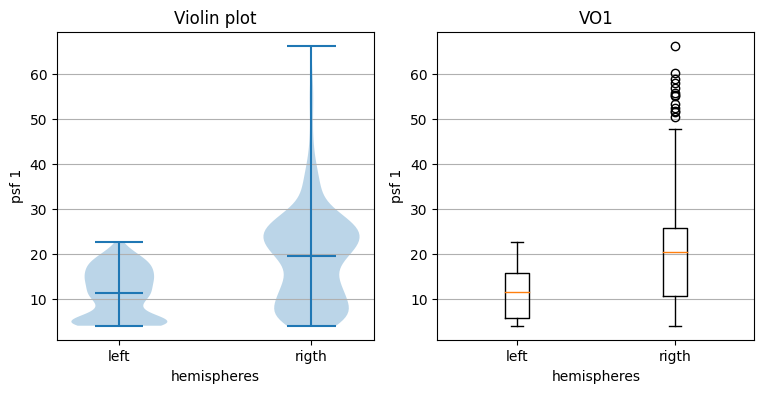

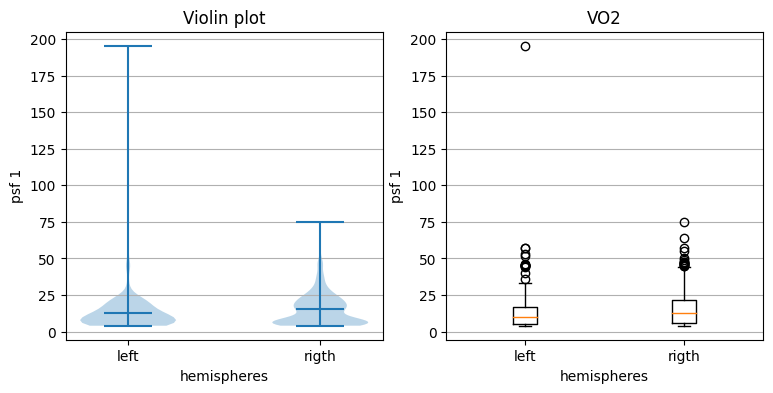

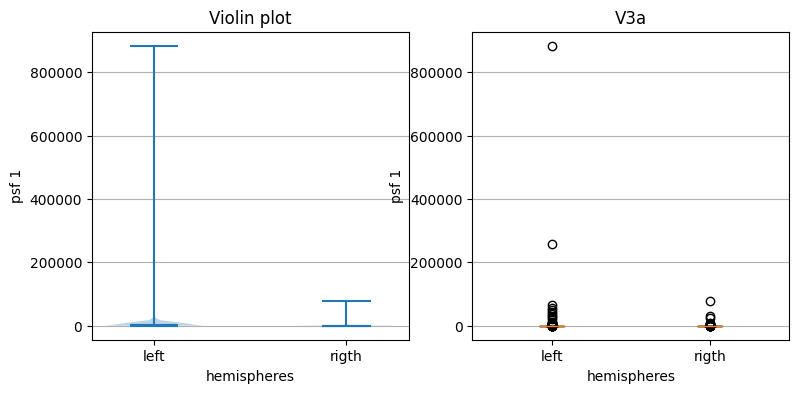

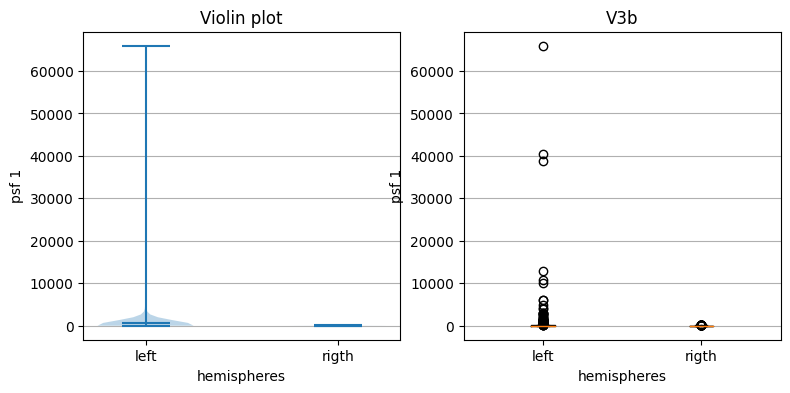

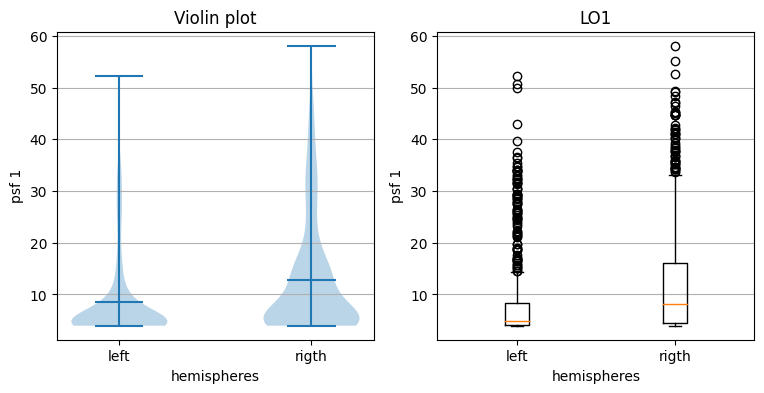

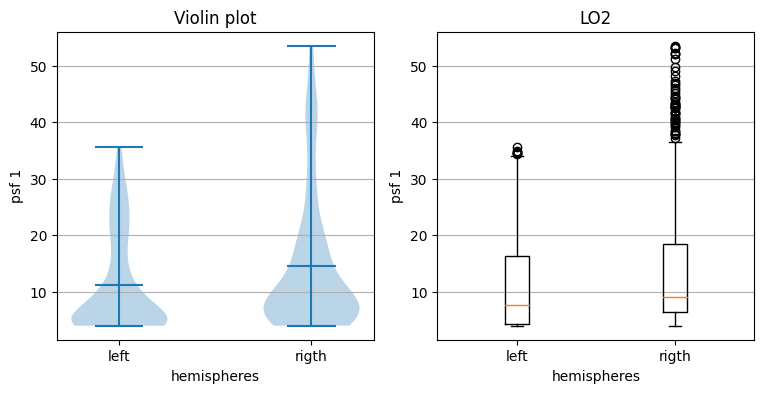

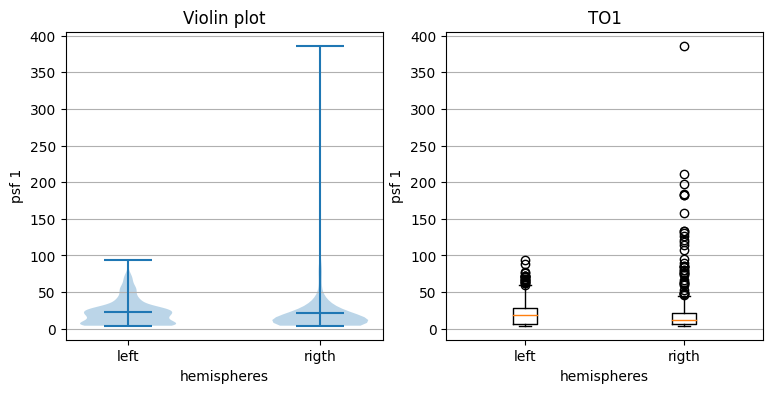

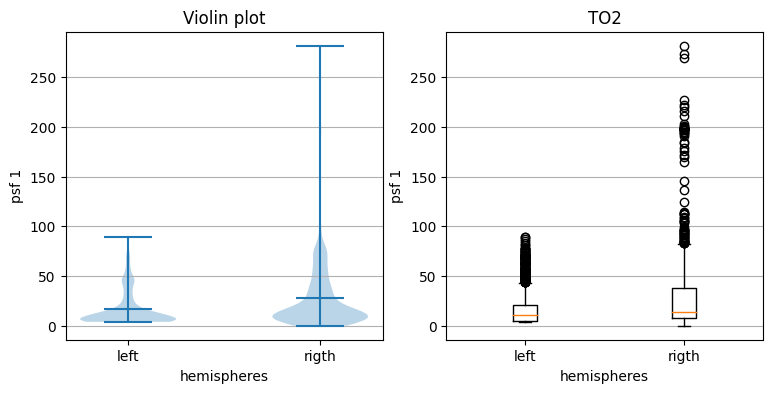

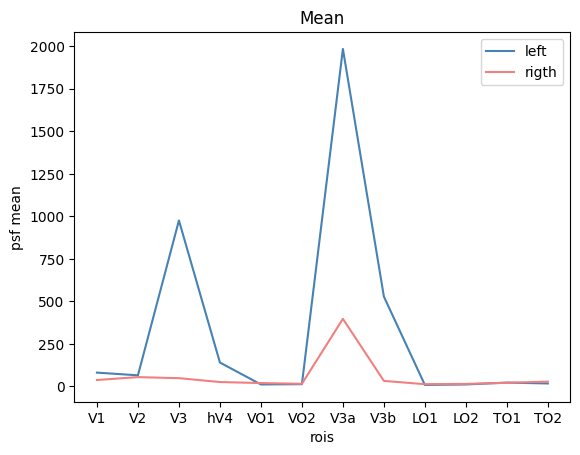

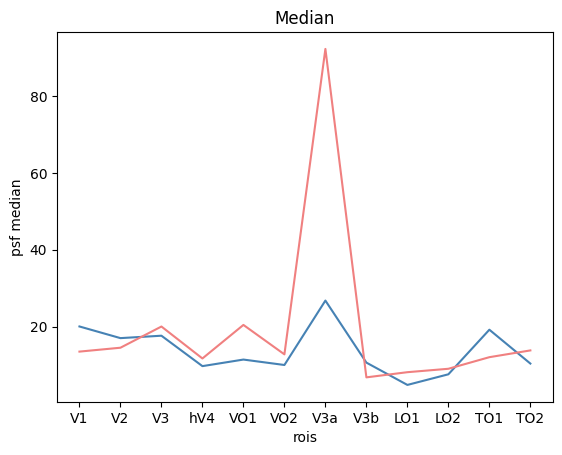

In [ ]:
ecc =np.load(f"F:\\ds003812-download\\derivatives\\prf_solutions\\all\\sub-wlsubj{sub_name}_full-eccen.npy", allow_pickle=True)
w_a = 98
psf_l = np.array([w_a/elem if elem > 10**(-8) else 0 for elem in ecc[0]])
psf_r = np.array([w_a/elem if elem > 10**(-8) else 0 for elem in ecc[1]])

mean_psfL = []
mean_psfR = []
median_psfL = []
median_psfR = []


for index_roi in range(1,13):
    idx_left = np.where(rois_data[0]==index_roi)
    idx_right= np.where(rois_data[1]==index_roi)

    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
    
    mean_psfL.append(np.mean(psf_l[idx_left[0]]))
    mean_psfR.append(np.mean(psf_r[idx_right[0]]))
    median_psfL.append(np.median(psf_l[idx_left[0]]))
    median_psfR.append(np.median(psf_r[idx_right[0]]))

    all_data = [psf_l[idx_left[0]],psf_r[idx_right[0]]]  
    
    axs[0].violinplot(all_data,
                      showmeans=True,
                      showmedians=False)
    axs[0].set_title('Violin plot')
    # plot box plot
    axs[1].boxplot(all_data)
    axs[1].set_title(f'{rois[index_roi-1]}')
    # adding horizontal grid lines
    for ax in axs:
        ax.yaxis.grid(True)
        ax.set_xticks([y + 1 for y in range(len(all_data))],
                      labels=['left', 'right'])
        ax.set_xlabel('hemispheres')
        ax.set_ylabel(f'psf {freq + 1}')
    plt.show()

plt.plot(rois,mean_psfL,color='steelblue', label='left')
plt.plot(rois,mean_psfR, color='lightcoral', label = 'right')
plt.xlabel('rois')
plt.ylabel('psf mean')
plt.title("Mean")
plt.legend()
plt.show()

plt.plot(rois,median_psfL,color='steelblue')
plt.plot(rois,median_psfR, color='lightcoral')
plt.xlabel('rois')
plt.ylabel('psf median')
plt.title("Median")
plt.show()

# Normalidad

Analizar distribucion betas.

In [13]:
from scipy.stats import probplot

for i in range(10):
    data = pd.read_csv(f"C:\\Users\\Marie\\Documents\\thesis\\broderick\\table_beta_freq_{i}_data_full_inferred_varea.csv")

    # Histograma
    plt.hist(data['betas'],range=(-1,1), color='skyblue')
    print(f" mean:{np.mean(data['betas'])}")
    print(f"std: {np.std(data['betas'])}")
    # Gráfico Q-Q
    #probplot(data['betas'], dist='norm', plot=plt)
    plt.show()


ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.